In [5]:
import pandas as pd
from io import StringIO

# Membaca teks dari clipboard
data_clipboard = pd.read_clipboard()

# Mengonversi data clipboard menjadi string dan tampilkan
data_string = data_clipboard.to_string(index=False)
print("Data:\n", data_string)

# Sekarang coba membaca kembali data dari clipboard dengan delimiter
data_rama = pd.read_clipboard(sep=';')

# Menampilkan data
print(data_rama)

Data:
  Survived  Pclass                                                                              Name    Sex  Age  Siblings/Spouses Aboard  Parents/Children Aboard      Fare
        0       3                                                            Mr. Owen Harris Braund   male   22                        1                        0     7,25,
        1       1                                Mrs. John Bradley (Florence Briggs Thayer) Cumings female   38                        1                        0  71,2833,
        1       3                                                             Miss. Laina Heikkinen female   26                        0                        0    7,925,
        1       1                                       Mrs. Jacques Heath (Lily May Peel) Futrelle female   35                        1                        0     53,1,
        0       3                                                           Mr. William Henry Allen   male   35                      

In [6]:
#mengambil data pada kolom tertentu
data1 = data_rama.loc[:,['Age','Pclass','Survived']] 
print(data1)


    Age  Pclass  Survived
0    22       3         0
1    38       1         1
2    26       3         1
3    35       1         1
4    35       3         0
..   ..     ...       ...
882  27       2         0
883  19       1         1
884   7       3         0
885  26       1         1
886  32       3         0

[887 rows x 3 columns]


<Axes: title={'center': 'Persebaran Data'}, xlabel='Age', ylabel='Pclass'>

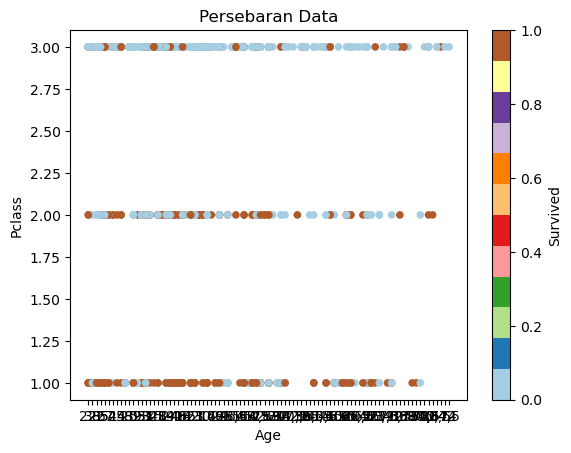

In [7]:
#memvisualisasikan data titanic
data2 = data_rama[['Age', 'Pclass', 'Survived']]
data2.plot(title='Persebaran Data', x='Age', y='Pclass', kind='scatter', c='Survived', colormap='Paired')

In [8]:
#memanipulasi data jumlah penumpang berdasarkan group Pclass 
data3 = data_rama[['Name', 'Sex', 'Age', 'Pclass', 'Fare']] 
penumpang=data3.groupby('Pclass')['Name'].nunique() 
print('Jumlah Penumpang:\n', penumpang)

Jumlah Penumpang:
 Pclass
1    216
2    184
3    487
Name: Name, dtype: int64


In [10]:
#memfilter data penumpang yang selamat berdasarkan pclass 
data4 = data_rama[['Name', 'Sex', 'Age', 'Pclass', 'Fare']]
notsurvivedpassanger=data4['Pclass'].loc[data_rama['Survived']==0] 
print('Penumpang yang tidak survived:\n', notsurvivedpassanger.value_counts()) 
survivedpassanger=data4['Pclass'].loc[data_rama['Survived']==1] 
print('\nPenumpang yang survived:\n', survivedpassanger.value_counts())


Penumpang yang tidak survived:
 Pclass
3    368
2     97
1     80
Name: count, dtype: int64

Penumpang yang survived:
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64


In [13]:
# Groupby berdasarkan jenis kelamin (sex) dan hitung jumlah penumpang
jumlah_penumpang_per_sex = data_rama.groupby('Sex').size()

# Tampilkan hasil
print("Jumlah penumpang berdasarkan kelompok jenis kelamin:")
print(jumlah_penumpang_per_sex)

Jumlah penumpang berdasarkan kelompok jenis kelamin:
Sex
female    314
male      573
dtype: int64


In [14]:
# Filter data penumpang yang selamat berdasarkan jenis kelamin
penumpang_selamat_per_sex = data_rama[(data_rama['Survived'] == 1) & (data_rama['Sex'] == 'male')]

# Menampilkan hasil filter data
print(penumpang_selamat_per_sex)

     Survived  Pclass                            Name   Sex Age  \
17          1       2     Mr. Charles Eugene Williams  male  23   
21          1       2            Mr. Lawrence Beesley  male  34   
23          1       1     Mr. William Thompson Sloper  male  28   
36          1       3                 Mr. Hanna Mamee  male  18   
54          1       1                Mr. Hugh Woolner  male  46   
..        ...     ...                             ...   ...  ..   
834         1       3                  Mr. Chang Chip  male  32   
835         1       1             Mr. Pierre Marechal  male  29   
853         1       1            Mr. Peter Denis Daly  male  51   
865         1       3  Master. Harold Theodor Johnson  male   4   
885         1       1            Mr. Karl Howell Behr  male  26   

     Siblings/Spouses Aboard  Parents/Children Aboard      Fare  
17                         0                        0      13,,  
21                         0                        0      13,,